# Task 1 :Import **Librairies** and **Datasets**

---


## Import Librairies and Dataset

In [ ]:
import seaborn as sns #provides interface for drawing attractive and informative statistical graphics
import nltk #NLTK is a standard python library with prebuilt functions and utilities for the ease of use and implementation. It is one of the most used libraries for natural language processing and computational linguistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import gensim # Text modeling
from gensim.utils import simple_preprocess #tokenizes a text
from gensim.parsing.preprocessing import STOPWORDS # contains 337 stop word

nltk.download('punkt') #This tokenizer divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. It must be trained on a large collection of plaintext in the target language before it can be used.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Load our dataset
tweets_data = pd.read_csv("Data-FakeRealCOVID.csv")

## Verify our data 

In [ ]:
tweets_data

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,fake
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake


We will use **6420 tweets**



In [ ]:
tweets_data.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

We have **no null values** which is a good point

In [ ]:
tweets_data['tweet'][0]

'The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.'

In [ ]:
#Generate a column of labels as integer
tweets_data['label_int'] = tweets_data['label']
tweets_data['label_int'] = tweets_data['label_int'].replace({'fake': '0'})
tweets_data['label_int'] = tweets_data['label_int'].replace({'real': '1'})
tweets_data["label_int"] = tweets_data["label_int"].astype(str).astype(int)
tweets_data

,id,tweet,label,label_int
0,1,The CDC currently reports 99031 deaths. In gen...,real,1
1,2,States reported 1121 deaths a small rise from ...,real,1
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,0
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,1
4,5,Populous states can generate large case counts...,real,1
...,...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,fake,0
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake,0
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake,0
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake,0


In [ ]:
#Verify the types of columns
tweets_data.dtypes

id            int64
tweet        object
label        object
label_int     int64
dtype: object

# Task 2 : Data Cleaning

---




## Remove Stopword

In [ ]:
# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')
stop_words.extend(['subject', 're', 'edu', 'use','http','https'])

In [ ]:
# Remove stopwords and remove words with 2 or less characters
def stopwords_remover(text):
    result = []
    for token in gensim.utils.simple_preprocess(text): 
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words: #len(stop_words) = 185 --- len(gensim.parsing.preprocessing.STOPWORDS) = 337
            result.append(token)
            
    return result

In [ ]:
# Apply the function to the dataframe
tweets_data['stopwordsFree'] = tweets_data['tweet'].apply(stopwords_remover)

In [ ]:
# join the words into a string
tweets_data['stopwordsFree_joined'] = tweets_data['stopwordsFree'].apply(lambda x: " ".join(x))


## Lemmatization

In [ ]:
# Donwload wordnet to lemmatize
import nltk
nltk.download('wordnet') #lexical database for the English language

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Importing what we need for stemming
from nltk.stem import WordNetLemmatizer

In [ ]:
# Function to lemmatize words
def lemmatizer(text):
  result=[]
  lemmatizer=WordNetLemmatizer()
  input=text
  input=input.lower() 
  input=nltk.word_tokenize(input)
  for token in input:
    word_lemmatized=lemmatizer.lemmatize(token)
    result.append(word_lemmatized)

  return result
  

In [ ]:
# join the words into a string
tweets_data['lemmatized']=tweets_data['stopwordsFree_joined'].apply(lemmatizer)

In [ ]:
# join the words into a string
tweets_data['lemmatized_joined'] = tweets_data['lemmatized'].apply(lambda x: " ".join(x))

## Stemming

In [ ]:
# Importing what we need for stemming
from nltk.stem import PorterStemmer

In [ ]:
# Function to stem words
def stemmer(text):
  result=[]
  stemmer=PorterStemmer()
  input=text
  input=nltk.word_tokenize(input)
  for token in input:
    word_stemmed=stemmer.stem(token)
    result.append(word_stemmed)

  return result
  


In [ ]:
# Apply the function to the dataframe
tweets_data['cleaned']=tweets_data['lemmatized_joined'].apply(stemmer)


In [ ]:
# join the words into a string
tweets_data['cleaned_joined'] = tweets_data['cleaned'].apply(lambda x: " ".join(x))

## Additionnal cleaning

In [ ]:
#eliminer les liens
#eliminer les emojis
#eliminer les hashtags et les @
#eliminer les nombres
import re

def character_eliminator(text):
  #utilisation des expressions regulieres
  text= re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
  text= re.sub('#[^^\s]*', '', text) 
  text= re.sub('@[^^\s]*', '', text)
  text= re.sub('[^^\s]*_[^^\s]*', '', text)
  text= re.sub('[^^\s]*-[^^\s]*', '', text)


  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                             
        "]+", flags=re.UNICODE)
  text= emoji_pattern.sub(r'', text)
  return text 

def numbers_eliminator(text):
    return re.sub('[0-9]+', '', text) 


In [ ]:
def ponctuation_eliminator(tokens):
    ponctuation = ['.',',',';',':','“','"','[',']','{','}','(','’',')','”','-','%','_','*','+','=','?','!','~','&','£','$','`',"'","''",'^','´','``','/','//','…','•','​⁣',' ⃣']
    tokens = ''.join([i for i in tokens if i not in ponctuation])
    return tokens

In [ ]:
tweets_data['cleaned_joined'].apply(character_eliminator)
tweets_data['cleaned_joined'].apply(numbers_eliminator)
tweets_data['cleaned_joined'].apply(ponctuation_eliminator)


0       current report death gener discrep death count...
1       state report death small rise tuesday southern...
2       polit correct woman us pandem excus reus plast...
3       covid test laboratori india august test profbh...
4       popul state gener larg case count look case mi...
                              ...                        
6415            tiger test posit covid stay away pet bird
6416    autopsi prove covid blood clot pneumonia ought...
6417    post claim covid vaccin develop caus widesprea...
6418                    aamir khan donat relief care fund
6419    day case covid acquir local unknown sourc tota...
Name: cleaned_joined, Length: 6420, dtype: object

In [ ]:
tweets_data

,id,tweet,label,label_int,stopwordsFree,stopwordsFree_joined,lemmatized,lemmatized_joined,cleaned,cleaned_joined
0,1,The CDC currently reports 99031 deaths. In gen...,real,1,"[currently, reports, deaths, general, discrepa...",currently reports deaths general discrepancies...,"[currently, report, death, general, discrepanc...",currently report death general discrepancy dea...,"[current, report, death, gener, discrep, death...",current report death gener discrep death count...
1,2,States reported 1121 deaths a small rise from ...,real,1,"[states, reported, deaths, small, rise, tuesda...",states reported deaths small rise tuesday sout...,"[state, reported, death, small, rise, tuesday,...",state reported death small rise tuesday southe...,"[state, report, death, small, rise, tuesday, s...",state report death small rise tuesday southern...
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,0,"[politically, correct, woman, uses, pandemic, ...",politically correct woman uses pandemic excuse...,"[politically, correct, woman, us, pandemic, ex...",politically correct woman us pandemic excuse r...,"[polit, correct, woman, us, pandem, excus, reu...",polit correct woman us pandem excus reus plast...
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,1,"[covid, testing, laboratories, india, august, ...",covid testing laboratories india august tests ...,"[covid, testing, laboratory, india, august, te...",covid testing laboratory india august test pro...,"[covid, test, laboratori, india, august, test,...",covid test laboratori india august test profbh...
4,5,Populous states can generate large case counts...,real,1,"[populous, states, generate, large, case, coun...",populous states generate large case counts loo...,"[populous, state, generate, large, case, count...",populous state generate large case count look ...,"[popul, state, gener, larg, case, count, look,...",popul state gener larg case count look case mi...
...,...,...,...,...,...,...,...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,fake,0,"[tiger, tested, positive, covid, stay, away, p...",tiger tested positive covid stay away pets birds,"[tiger, tested, positive, covid, stay, away, p...",tiger tested positive covid stay away pet bird,"[tiger, test, posit, covid, stay, away, pet, b...",tiger test posit covid stay away pet bird
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake,0,"[autopsies, prove, covid, blood, clot, pneumon...",autopsies prove covid blood clot pneumonia oug...,"[autopsy, prove, covid, blood, clot, pneumonia...",autopsy prove covid blood clot pneumonia ought...,"[autopsi, prove, covid, blood, clot, pneumonia...",autopsi prove covid blood clot pneumonia ought...
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake,0,"[post, claims, covid, vaccine, developed, caus...",post claims covid vaccine developed cause wide...,"[post, claim, covid, vaccine, developed, cause...",post claim covid vaccine developed cause wides...,"[post, claim, covid, vaccin, develop, caus, wi...",post claim covid vaccin develop caus widesprea...
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake,0,"[aamir, khan, donate, relief, cares, fund]",aamir khan donate relief cares fund,"[aamir, khan, donate, relief, care, fund]",aamir khan donate relief care fund,"[aamir, khan, donat, relief, care, fund]",aamir khan donat relief care fund


## Assembling all the cleaning steps in one function.

In [ ]:
def listToString(liste): 
    
    # initialize an empty string
    text = "" 
    
    # traverse in the string  
    for word in liste: 
        text += ' ' + word  
    
    # return string  
    return text 

In [ ]:
def preprocess(tweet):
  tweet = stopwords_remover(tweet)
  tweet  = listToString(tweet)
  tweet = lemmatizer(tweet)
  tweet = listToString(tweet)
  tweet = stemmer(tweet)
  tweet = listToString(tweet)
  tweet = numbers_eliminator(tweet)
  tweet = character_eliminator(tweet)
  tweet = ponctuation_eliminator(tweet)
  return tweet


## Compare before and after


In [ ]:
# Show original tweet
tweets_data['tweet'][0]

'The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.'

In [ ]:
# Show stopwords free news after removing stopwords
print(tweets_data['stopwordsFree_joined'][0])

currently reports deaths general discrepancies death counts different sources small explicable death toll stands roughly people today


In [ ]:
print(tweets_data['lemmatized_joined'][0])

currently report death general discrepancy death count different source small explicable death toll stand roughly people today


In [ ]:
# Show fully cleaned up news after removing stopwords
print(tweets_data['cleaned_joined'][0])

current report death gener discrep death count differ sourc small explic death toll stand roughli peopl today


In [ ]:
tweets_data.head()

,id,tweet,label,label_int,stopwordsFree,stopwordsFree_joined,lemmatized,lemmatized_joined,cleaned,cleaned_joined
0,1,The CDC currently reports 99031 deaths. In gen...,real,1,"[currently, reports, deaths, general, discrepa...",currently reports deaths general discrepancies...,"[currently, report, death, general, discrepanc...",currently report death general discrepancy dea...,"[current, report, death, gener, discrep, death...",current report death gener discrep death count...
1,2,States reported 1121 deaths a small rise from ...,real,1,"[states, reported, deaths, small, rise, tuesda...",states reported deaths small rise tuesday sout...,"[state, reported, death, small, rise, tuesday,...",state reported death small rise tuesday southe...,"[state, report, death, small, rise, tuesday, s...",state report death small rise tuesday southern...
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,0,"[politically, correct, woman, uses, pandemic, ...",politically correct woman uses pandemic excuse...,"[politically, correct, woman, us, pandemic, ex...",politically correct woman us pandemic excuse r...,"[polit, correct, woman, us, pandem, excus, reu...",polit correct woman us pandem excus reus plast...
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,1,"[covid, testing, laboratories, india, august, ...",covid testing laboratories india august tests ...,"[covid, testing, laboratory, india, august, te...",covid testing laboratory india august test pro...,"[covid, test, laboratori, india, august, test,...",covid test laboratori india august test profbh...
4,5,Populous states can generate large case counts...,real,1,"[populous, states, generate, large, case, coun...",populous states generate large case counts loo...,"[populous, state, generate, large, case, count...",populous state generate large case count look ...,"[popul, state, gener, larg, case, count, look,...",popul state gener larg case count look case mi...


# Task 3 : Visualize the Cleaned Data

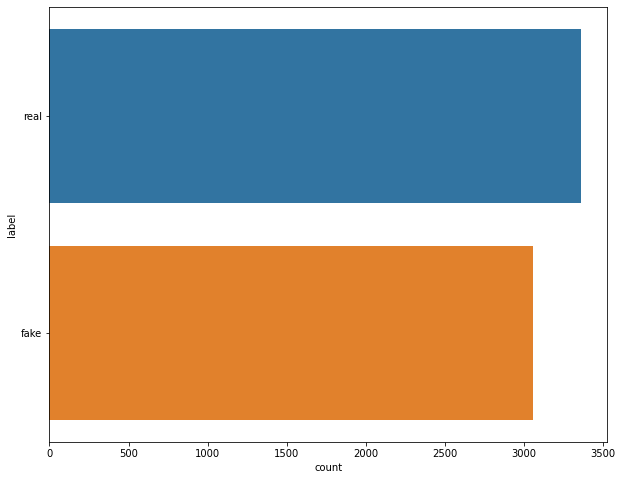

In [ ]:
# Fake vs. True tweets
plt.figure(figsize = (10,8))
sns.countplot(y='label', data = tweets_data)


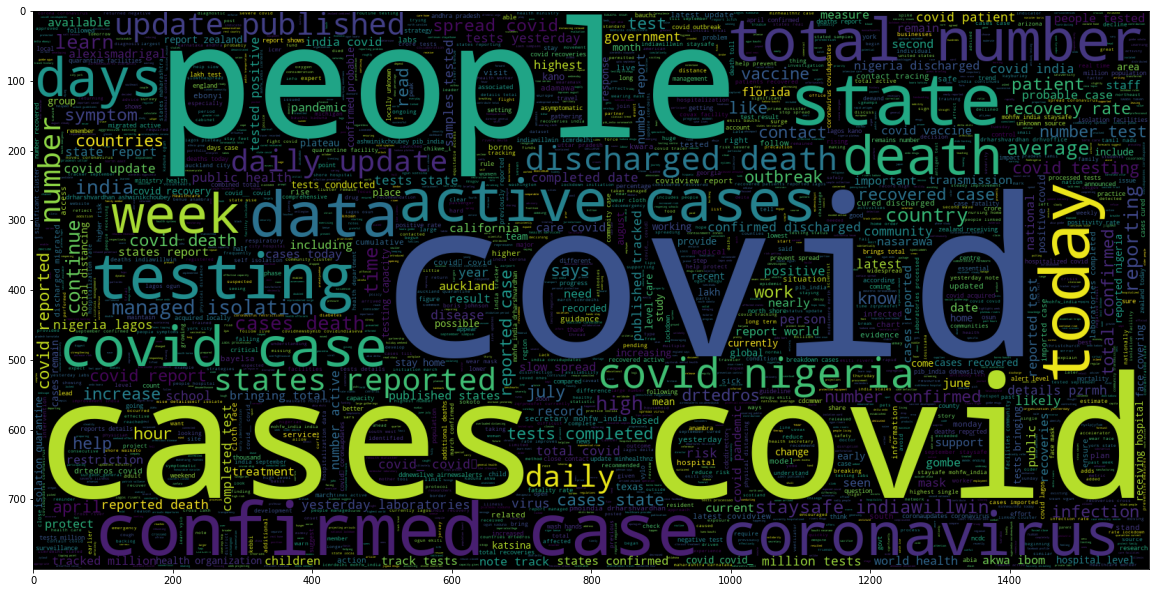

In [ ]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(tweets_data[tweets_data.label == 'real'].stopwordsFree_joined))
plt.imshow(wc)

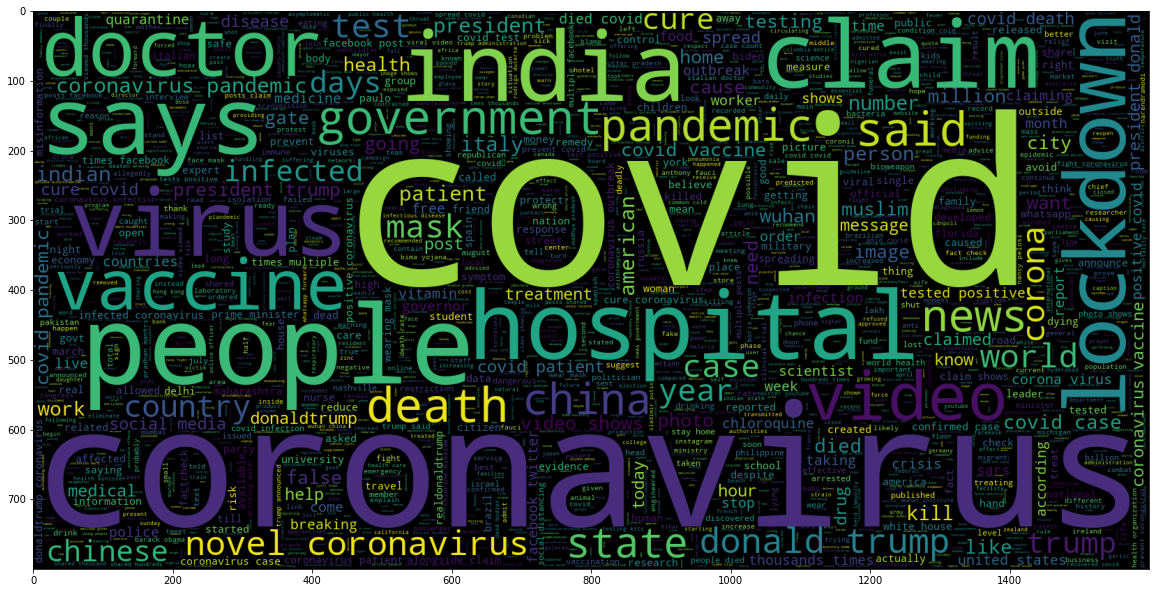

In [ ]:
# plot the word cloud for tweet that is Fake
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(tweets_data[tweets_data.label == 'fake'].stopwordsFree_joined))
plt.imshow(wc)

In [ ]:
# length of maximum document will be needed to create word embeddings 
maxlen = -1
for doc in tweets_data.cleaned_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any tweet is =", maxlen)

The maximum number of words in any tweet is = 766


In [ ]:
# visualize the distribution of number of words in a text
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(y)) for y in tweets_data.cleaned_joined], nbins = 100)
fig.show()

# Task 4 : Build and Train the model

---


In [ ]:
import torch
import torch.nn as nn
import nltk as nk

## TF-IDF Vectorizer(Term Frequency and Inverse Document Frequency)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def TfIdfVector(tweets_data):
    text = []
    for  tweet in tweets_data.cleaned_joined :
      text.append(tweet)

    vectorizer = TfidfVectorizer().fit(text)

    tfidf_tokens = vectorizer.get_feature_names_out()
    tweet_vect = vectorizer.transform(text)

    tweets_data_tfidf_vect = pd.DataFrame(data=tweet_vect.toarray(),columns=tfidf_tokens)

    return tweets_data_tfidf_vect, vectorizer

In [ ]:
TfIdfVector(tweets_data)

(      aacjvhg  aadajoli  aaddqsuhsu  ...  被監視居住  𝗰𝗼𝗺𝗽𝗹𝗲𝘁𝗲𝗹𝘆  𝗶𝗻𝗮𝗰𝘁𝗶𝘃𝗮𝘁𝗲
 0         0.0       0.0         0.0  ...    0.0         0.0         0.0
 1         0.0       0.0         0.0  ...    0.0         0.0         0.0
 2         0.0       0.0         0.0  ...    0.0         0.0         0.0
 3         0.0       0.0         0.0  ...    0.0         0.0         0.0
 4         0.0       0.0         0.0  ...    0.0         0.0         0.0
 ...       ...       ...         ...  ...    ...         ...         ...
 6415      0.0       0.0         0.0  ...    0.0         0.0         0.0
 6416      0.0       0.0         0.0  ...    0.0         0.0         0.0
 6417      0.0       0.0         0.0  ...    0.0         0.0         0.0
 6418      0.0       0.0         0.0  ...    0.0         0.0         0.0
 6419      0.0       0.0         0.0  ...    0.0         0.0         0.0
 
 [6420 rows x 12101 columns], TfidfVectorizer())

In [ ]:
new_df,tfIdfObject = TfIdfVector(tweets_data)

In [ ]:
new_df

,aacjvhg,aadajoli,aaddqsuhsu,aadhr,aai_offici,aajlwd,aajtak,aamaadmiparti,aamctoday,aamir,aamjhkc,aaradhya,aasmv,aaurl,aautx,aaxhzlxqq,ababa,abacha,abakaliki,abal,abandon,abat,abba,abbasi,abbott,abbottnew,abbrevi,abcworldnew,abdic,abdul,abdulaziz,abhi,abhigyan,abhishek,abia,abid,abil,abl,abledoc,ableg,...,ztnye,ztqnsxeqbk,ztram,ztvi,ztyhjzn,zubymus,zumkcfpvpk,zupjjldh,zupq,zutycuzrv,zuxra,zuzprsi,zvmaqf,zwgj,zwndkhqi,zwpc,zwt,zwtfmuu,zwwwp,zxbiikmp,zxferiy,zxknnhz,zxqfhonpj,zydu,zyjg,zypgbf,zyphr,zytaud,zyzznbg,zzmgdntlcg,zzmgvtsqgt,zztcnydw,zzush,áñez,बर_य,ನಗಳಲ,監獄絕食抗議,被監視居住,𝗰𝗼𝗺𝗽𝗹𝗲𝘁𝗲𝗹𝘆,𝗶𝗻𝗮𝗰𝘁𝗶𝘃𝗮𝘁𝗲
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pickle

In [ ]:
pickle.dump(tfIdfObject, open("tfidf.pkl", "wb"))

In [ ]:
data=torch.tensor(new_df.to_numpy())

In [ ]:
data


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [ ]:
outs=torch.tensor(tweets_data.label_int.to_numpy())
outs

tensor([1, 1, 0,  ..., 0, 0, 1])

## Training the model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Create 4 tensors as a result of the splitting: training data, test data, training labels, and test labels
x_train, x_test, y_train, y_test = train_test_split(data, outs, test_size=0.2)
x_train.shape

torch.Size([5136, 12101])

In [ ]:
# Create 4 tensors as a result of the splitting: training data, validation data, training labels, and validation labels
train_data, validation_data, train_targets, validation_targets = train_test_split(x_train, y_train, test_size=1000)
train_data.shape

torch.Size([4136, 12101])

In [ ]:
from torch.utils.data import Dataset

In [ ]:
class ANN(Dataset):
    def __init__(self, data, outs):
        super(ANN, self)
        self.data = data
        self.outs = outs
    def __getitem__(self, idx):
        return self.data[idx], self.outs[idx]
    def __len__(self):
        return len(self.outs)


In [ ]:
# Create the 3 objects by instantiating our class
train_dataset = ANN(train_data , train_targets)
test_dataset = ANN(x_test, y_test)
validation_dataset = ANN(validation_data, validation_targets)

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
batch_size = 64

In [ ]:
# Create the DataLoader objects for our training, test and validation datasets giving them the appropriate batch size
train_DL = DataLoader(train_dataset, batch_size=batch_size)
test_DL = DataLoader(test_dataset, batch_size=batch_size)
validation_DL = DataLoader(validation_dataset, batch_size=batch_size)

In [ ]:
# Define the cost function. We worked with CrossEntropyLoss
loss_function = nn.CrossEntropyLoss()

## Model 1

In [ ]:
# Using Sequential(), we create a model with 3 layers: Input, 1 Hidden layer, Output
fakenewsNN_1 = nn.Sequential(nn.Linear(train_data.shape[1], 64),
                           nn.ReLU(),nn.Linear(64, 32),nn.ReLU(),
                           nn.Linear(32, 2))

In [ ]:
# Define the optimizer we are going to use
import torch.optim as optim

optimizer1 = optim.SGD(fakenewsNN_1.parameters(), lr=0.05) # Stochastic Gradient Descent

In [ ]:
# Create a loop over the epochs:
def training1(epochs):
    for i in range(epochs):
        # Specify training mode
        fakenewsNN_1.train()
        # initialize the learning cost to 0
        coutApprentissage = 0
        # Boucler sur les batchs de 64 des données d'entraînement :
        for data,targets in train_DL:    
            # le vecteur des labels prédites par le modèle est le résultat de l'application du modèle sur le batch en cours. 
            output = fakenewsNN_1(data.float())
            # Calculer le coût en comparant les labels prédites aux targets du batch
            loss = loss_function(output,targets)
          # Backpropagation: 
            # Réinitialiser l'optimiseur
            optimizer1.zero_grad()
            # Calculate the gradients
            loss.backward()
            # Update weights/parameters
            optimizer1.step()
            # Update the learning cost by adding the cost of the data batch
            coutApprentissage += loss.item() # item() returns the value of the tensor as a standard Python number
        # At the exit of the training loop, we calculate the average cost for all the training data
        coutMoyen = coutApprentissage/len(train_dataset)
        print('train loss:',coutMoyen)
        # Initialize validation cost to 0
        coutValidation = 0
        # Initialize the number of correct predictions to 0
        prevision_correcte = 0
        # Specify the evaluation mode
        fakenewsNN_1.eval()
        # Indicate to Pytorch that we are not going to do a Gradient descent (as we are in the evaluation/validation stage)
        with torch.no_grad():
            # Loop through batches of 64 validation data:
            for data,targets in validation_DL:  
                # the vector of labels predicted by the model is the result of applying the model to the current batch. 
                output = fakenewsNN_1(data.float())
                # Calculate the cost by comparing the predicted labels to the batch targets
                loss = loss_function(output,targets)
                # Update the validation cost by adding the cost of the data batch
                coutValidation += loss.item()
                # Update the number of correct forecasts(prévisions) by adding the number of good forecasts on this batch
                # We compare the predicted label with the labels of the minibatch. 
                # We use argmax to get the final forecast from the forecast vector
                prevision_correcte += torch.sum((torch.argmax(output, dim=1) == targets)).item()
            # At the exit of this loop, we calculate the average cost of validation
            cout_valid_moyenne = coutValidation/len(validation_dataset)
            print('validation loss:',cout_valid_moyenne)
            # Calculate the accuracy: the average of the correct predictions over all the observations in the validation dataset 
            prevision_correcte_moyenne = prevision_correcte/len(validation_dataset)
            print('accuracy:',prevision_correcte_moyenne*100,'%\n')
            
        # Display for each iteration the training cost, the validation cost, and the precision.


In [ ]:
training1(10)

train loss: 0.01088324173333797
validation loss: 0.011063855528831481
accuracy: 52.400000000000006 %

train loss: 0.010869070945210337
validation loss: 0.011058777630329131
accuracy: 52.400000000000006 %

train loss: 0.010864046126661725
validation loss: 0.011053355693817138
accuracy: 52.400000000000006 %

train loss: 0.010858184883165636
validation loss: 0.011046835184097291
accuracy: 52.400000000000006 %

train loss: 0.010851262515587318
validation loss: 0.011039161264896393
accuracy: 52.400000000000006 %

train loss: 0.010842960911516526
validation loss: 0.011029787123203278
accuracy: 52.400000000000006 %

train loss: 0.010832634089763206
validation loss: 0.011017938137054444
accuracy: 52.400000000000006 %

train loss: 0.010819395200657429
validation loss: 0.01100257831811905
accuracy: 52.400000000000006 %

train loss: 0.010802067960369288
validation loss: 0.010982264399528503
accuracy: 52.400000000000006 %

train loss: 0.01077901079126668
validation loss: 0.010955046415328979
accur

## Model 2:

In [ ]:
# Using Sequential(), create a model with 3 layers: Input, 1 Hidden layer, Output
fakenewsNN_2 = nn.Sequential(nn.Linear(train_data.shape[1], 64),
                           nn.ReLU(),nn.Linear(64, 32),nn.ReLU(),
                           nn.Linear(32, 2))

In [ ]:
# Define the optimizer we are going to use
import torch.optim as optim

optimizer2 = optim.Adam(fakenewsNN_2.parameters(), lr=0.05) #The Adam optimization algorithm is an extension to stochastic gradient descent

In [ ]:
# Create a loop over the epochs:
def training2(epochs):
    for i in range(epochs):
        # Specify training mode
        fakenewsNN_2.train()
        # initialize the learning cost to 0
        coutApprentissage = 0
        # Boucler sur les batchs de 64 des données d'entraînement :
        for data,targets in train_DL:    
            # le vecteur des labels prédites par le modèle est le résultat de l'application du modèle sur le batch en cours. 
            output = fakenewsNN_2(data.float())
            # Calculer le coût en comparant les labels prédites aux targets du batch
            loss = loss_function(output,targets)
          # Backpropagation: 
            # Réinitialiser l'optimiseur
            optimizer2.zero_grad()
            # Calculate the gradients
            loss.backward()
            # Update weights/parameters
            optimizer2.step()
            # Update the learning cost by adding the cost of the data batch
            coutApprentissage += loss.item() # item() returns the value of the tensor as a standard Python number
        # At the exit of the training loop, we calculate the average cost for all the training data
        coutMoyen = coutApprentissage/len(train_dataset)
        print('train loss:',coutMoyen)
        # Initialize validation cost to 0
        coutValidation = 0
        # Initialize the number of correct predictions to 0
        prevision_correcte = 0
        # Specify the evaluation mode
        fakenewsNN_2.eval()
        # Indicate to Pytorch that we are not going to do a Gradient descent (as we are in the evaluation/validation stage)
        with torch.no_grad():
            # Loop through batches of 64 validation data:
            for data,targets in validation_DL:  
                # the vector of labels predicted by the model is the result of applying the model to the current batch. 
                output = fakenewsNN_2(data.float())
                # Calculate the cost by comparing the predicted labels to the batch targets
                loss = loss_function(output,targets)
                # Update the validation cost by adding the cost of the data batch
                coutValidation += loss.item()
                # Update the number of correct forecasts(prévisions) by adding the number of good forecasts on this batch
                # We compare the predicted label with the labels of the minibatch. 
                # We use argmax to get the final forecast from the forecast vector
                prevision_correcte += torch.sum((torch.argmax(output, dim=1) == targets)).item()
            # At the exit of this loop, we calculate the average cost of validation
            cout_valid_moyenne = coutValidation/len(validation_dataset)
            print('validation loss:',cout_valid_moyenne)
            # Calculate the accuracy: the average of the correct predictions over all the observations in the validation dataset 
            prevision_correcte_moyenne = prevision_correcte/len(validation_dataset)
            print('accuracy:',prevision_correcte_moyenne*100,'%\n')
            
        # Display for each iteration the training cost, the validation cost, and the precision.


In [ ]:
training2(10)

train loss: 0.0048669803152635435
validation loss: 0.004460148602724075
accuracy: 89.9 %

train loss: 0.00065532328251305
validation loss: 0.006602648302912712
accuracy: 90.4 %

train loss: 0.0001602328217177977
validation loss: 0.009418011724948883
accuracy: 91.60000000000001 %

train loss: 7.63846352630452e-05
validation loss: 0.012850807368755341
accuracy: 90.5 %

train loss: 3.840547850840087e-05
validation loss: 0.013033591985702515
accuracy: 89.8 %

train loss: 1.6482311883211408e-05
validation loss: 0.014499426692724228
accuracy: 89.5 %

train loss: 7.773781038782361e-05
validation loss: 0.015506194829940796
accuracy: 90.5 %

train loss: 0.00011764696092436463
validation loss: 0.014552827566862107
accuracy: 89.8 %

train loss: 0.00010607699299746222
validation loss: 0.014413093566894531
accuracy: 90.0 %

train loss: 4.9571021045142446e-05
validation loss: 0.014007718294858933
accuracy: 89.2 %



## Model 3:

In [ ]:
# Using Sequential(), create a model with 3 layers: Input, 1 Hidden layer, Output
fakenewsNN_3 = nn.Sequential(nn.Linear(train_data.shape[1], 64),
                           nn.ReLU(),nn.Linear(64, 32),nn.ReLU(),
                           nn.Linear(32, 2))

In [ ]:
# Define the optimizer we are going to use
import torch.optim as optim

optimizer3 = optim.Adam(fakenewsNN_3.parameters(), lr=0.005)

In [ ]:
# Create a loop over the epochs:
def training3(epochs):
    for i in range(epochs):
        # Specify training mode
        fakenewsNN_3.train()
        # initialize the learning cost to 0
        coutApprentissage = 0
        # Boucler sur les batchs de 64 des données d'entraînement :
        for data,targets in train_DL:    
            # le vecteur des labels prédites par le modèle est le résultat de l'application du modèle sur le batch en cours. 
            output = fakenewsNN_3(data.float())
            # Calculer le coût en comparant les labels prédites aux targets du batch
            loss = loss_function(output,targets)
          # Backpropagation: 
            # Réinitialiser l'optimiseur
            optimizer3.zero_grad()
            # Calculate the gradients
            loss.backward()
            # Update weights/parameters
            optimizer3.step()
            # Update the learning cost by adding the cost of the data batch
            coutApprentissage += loss.item() # item() returns the value of the tensor as a standard Python number
        # At the exit of the training loop, we calculate the average cost for all the training data
        coutMoyen = coutApprentissage/len(train_dataset)
        print('train loss:',coutMoyen)
        # Initialize validation cost to 0
        coutValidation = 0
        # Initialize the number of correct predictions to 0
        prevision_correcte = 0
        # Specify the evaluation mode
        fakenewsNN_3.eval()
        # Indicate to Pytorch that we are not going to do a Gradient descent (as we are in the evaluation/validation stage)
        with torch.no_grad():
            # Loop through batches of 64 validation data:
            for data,targets in validation_DL:  
                # the vector of labels predicted by the model is the result of applying the model to the current batch. 
                output = fakenewsNN_3(data.float())
                # Calculate the cost by comparing the predicted labels to the batch targets
                loss = loss_function(output,targets)
                # Update the validation cost by adding the cost of the data batch
                coutValidation += loss.item()
                # Update the number of correct forecasts(prévisions) by adding the number of good forecasts on this batch
                # We compare the predicted label with the labels of the minibatch. 
                # We use argmax to get the final forecast from the forecast vector
                prevision_correcte += torch.sum((torch.argmax(output, dim=1) == targets)).item()
            # At the exit of this loop, we calculate the average cost of validation
            cout_valid_moyenne = coutValidation/len(validation_dataset)
            print('validation loss:',cout_valid_moyenne)
            # Calculate the accuracy: the average of the correct predictions over all the observations in the validation dataset 
            prevision_correcte_moyenne = prevision_correcte/len(validation_dataset)
            print('accuracy:',prevision_correcte_moyenne*100,'%\n')
            
        # Display for each iteration the training cost, the validation cost, and the precision.


In [ ]:
training3(10)

train loss: 0.005715064780076883
validation loss: 0.0036176982820034028
accuracy: 91.2 %

train loss: 0.0009058776196849855
validation loss: 0.004429208472371101
accuracy: 91.4 %

train loss: 0.00015277903308545652
validation loss: 0.0051670680902898315
accuracy: 90.60000000000001 %

train loss: 3.2650477749579705e-05
validation loss: 0.005592192951589823
accuracy: 90.4 %

train loss: 9.893984291642837e-06
validation loss: 0.005930784542113542
accuracy: 90.60000000000001 %

train loss: 5.710970082514373e-06
validation loss: 0.0061986718401312825
accuracy: 90.4 %

train loss: 3.7426861578841133e-06
validation loss: 0.006428251668810845
accuracy: 90.3 %

train loss: 2.567030629608949e-06
validation loss: 0.006712331101298332
accuracy: 90.3 %

train loss: 1.101112785298422e-06
validation loss: 0.008236662937328219
accuracy: 90.8 %

train loss: 4.94315490279433e-07
validation loss: 0.008852458417415618
accuracy: 90.9 %



## Model 4:

In [ ]:
# Using Sequential(), create a model with 3 layers: Input, 1 Hidden layer, Output
fakenewsNN_4 = nn.Sequential(nn.Linear(train_data.shape[1], 64),
                           nn.Sigmoid(),nn.Linear(64, 32),nn.Sigmoid(),
                           nn.Linear(32, 2))

In [ ]:
# Define the optimizer we are going to use
import torch.optim as optim

optimizer4 = optim.Adam(fakenewsNN_4.parameters(), lr=0.05)

In [ ]:
# Create a loop over the epochs:
def training4(epochs):
    for i in range(epochs):
        # Specify training mode
        fakenewsNN_4.train()
        # initialize the learning cost to 0
        coutApprentissage = 0
        # Boucler sur les batchs de 64 des données d'entraînement :
        for data,targets in train_DL:    
            # le vecteur des labels prédites par le modèle est le résultat de l'application du modèle sur le batch en cours. 
            output = fakenewsNN_4(data.float())
            # Calculer le coût en comparant les labels prédites aux targets du batch
            loss = loss_function(output,targets)
          # Backpropagation: 
            # Réinitialiser l'optimiseur
            optimizer4.zero_grad()
            # Calculate the gradients
            loss.backward()
            # Update weights/parameters
            optimizer4.step()
            # Update the learning cost by adding the cost of the data batch
            coutApprentissage += loss.item() # item() returns the value of the tensor as a standard Python number
        # At the exit of the training loop, we calculate the average cost for all the training data
        coutMoyen = coutApprentissage/len(train_dataset)
        print('train loss:',coutMoyen)
        # Initialize validation cost to 0
        coutValidation = 0
        # Initialize the number of correct predictions to 0
        prevision_correcte = 0
        # Specify the evaluation mode
        fakenewsNN_4.eval()
        # Indicate to Pytorch that we are not going to do a Gradient descent (as we are in the evaluation/validation stage)
        with torch.no_grad():
            # Loop through batches of 64 validation data:
            for data,targets in validation_DL:  
                # the vector of labels predicted by the model is the result of applying the model to the current batch. 
                output = fakenewsNN_4(data.float())
                # Calculate the cost by comparing the predicted labels to the batch targets
                loss = loss_function(output,targets)
                # Update the validation cost by adding the cost of the data batch
                coutValidation += loss.item()
                # Update the number of correct forecasts(prévisions) by adding the number of good forecasts on this batch
                # We compare the predicted label with the labels of the minibatch. 
                # We use argmax to get the final forecast from the forecast vector
                prevision_correcte += torch.sum((torch.argmax(output, dim=1) == targets)).item()
            # At the exit of this loop, we calculate the average cost of validation
            cout_valid_moyenne = coutValidation/len(validation_dataset)
            print('validation loss:',cout_valid_moyenne)
            # Calculate the accuracy: the average of the correct predictions over all the observations in the validation dataset 
            prevision_correcte_moyenne = prevision_correcte/len(validation_dataset)
            print('accuracy:',prevision_correcte_moyenne*100,'%\n')
            
        # Display for each iteration the training cost, the validation cost, and the precision.


In [ ]:
training4(10)

train loss: 0.00822304846355025
validation loss: 0.0048822427839040755
accuracy: 87.7 %

train loss: 0.0014654288624144903
validation loss: 0.005206003103405237
accuracy: 90.5 %

train loss: 0.00031019452644279676
validation loss: 0.0061375611126422884
accuracy: 91.0 %

train loss: 0.0001491219627707422
validation loss: 0.0067543088644742965
accuracy: 89.5 %

train loss: 6.974959653737816e-05
validation loss: 0.007293954990804196
accuracy: 89.7 %

train loss: 6.28481370213845e-05
validation loss: 0.00758114768564701
accuracy: 89.9 %

train loss: 3.847304656849436e-05
validation loss: 0.007885429762303829
accuracy: 89.7 %

train loss: 3.1970298721372176e-05
validation loss: 0.008313312456011772
accuracy: 89.0 %

train loss: 8.562679805986968e-06
validation loss: 0.008564289286732673
accuracy: 89.2 %

train loss: 6.773078586328396e-06
validation loss: 0.00879749447107315
accuracy: 89.2 %



## Model 5:

In [ ]:
# Using Sequential(), create a model with 3 layers: Input, 2 Hidden layers, Output
fakenewsNN_5 = nn.Sequential(nn.Linear(train_data.shape[1], 128),
                           nn.Sigmoid(),nn.Linear(128, 64),nn.Sigmoid(),
                           nn.Sigmoid(),nn.Linear(64, 32),nn.Sigmoid(),
                           nn.Linear(32, 2))

In [ ]:
# Define the optimizer we are going to use
import torch.optim as optim

optimizer5 = optim.Adam(fakenewsNN_5.parameters(), lr=0.005)

In [ ]:
# Create a loop over the epochs:
def training5(epochs):
    for i in range(epochs):
        # Specify training mode
        fakenewsNN_5.train()
        # initialize the learning cost to 0
        coutApprentissage = 0
        # Boucler sur les batchs de 64 des données d'entraînement :
        for data,targets in train_DL:    
            # le vecteur des labels prédites par le modèle est le résultat de l'application du modèle sur le batch en cours. 
            output = fakenewsNN_5(data.float())
            # Calculer le coût en comparant les labels prédites aux targets du batch
            loss = loss_function(output,targets)
          # Backpropagation: 
            # Réinitialiser l'optimiseur
            optimizer5.zero_grad()
            # Calculate the gradients
            loss.backward()
            # Update weights/parameters
            optimizer5.step()
            # Update the learning cost by adding the cost of the data batch
            coutApprentissage += loss.item() # item() returns the value of the tensor as a standard Python number
        # At the exit of the training loop, we calculate the average cost for all the training data
        coutMoyen = coutApprentissage/len(train_dataset)
        print('train loss:',coutMoyen)
        # Initialize validation cost to 0
        coutValidation = 0
        # Initialize the number of correct predictions to 0
        prevision_correcte = 0
        # Specify the evaluation mode
        fakenewsNN_5.eval()
        # Indicate to Pytorch that we are not going to do a Gradient descent (as we are in the evaluation/validation stage)
        with torch.no_grad():
            # Loop through batches of 64 validation data:
            for data,targets in validation_DL:  
                # the vector of labels predicted by the model is the result of applying the model to the current batch. 
                output = fakenewsNN_5(data.float())
                # Calculate the cost by comparing the predicted labels to the batch targets
                loss = loss_function(output,targets)
                # Update the validation cost by adding the cost of the data batch
                coutValidation += loss.item()
                # Update the number of correct forecasts(prévisions) by adding the number of good forecasts on this batch
                # We compare the predicted label with the labels of the minibatch. 
                # We use argmax to get the final forecast from the forecast vector
                prevision_correcte += torch.sum((torch.argmax(output, dim=1) == targets)).item()
            # At the exit of this loop, we calculate the average cost of validation
            cout_valid_moyenne = coutValidation/len(validation_dataset)
            print('validation loss:',cout_valid_moyenne)
            # Calculate the accuracy: the average of the correct predictions over all the observations in the validation dataset 
            prevision_correcte_moyenne = prevision_correcte/len(validation_dataset)
            print('accuracy:',prevision_correcte_moyenne*100,'%\n')
            
        # Display for each iteration the training cost, the validation cost, and the precision.


In [ ]:
training5(10)

train loss: 0.010909578786366681
validation loss: 0.01094440734386444
accuracy: 52.400000000000006 %

train loss: 0.007993234854688728
validation loss: 0.005287658795714379
accuracy: 87.0 %

train loss: 0.002180895473577471
validation loss: 0.004030966006219387
accuracy: 91.2 %

train loss: 0.0008827896087972638
validation loss: 0.004070593595504761
accuracy: 91.8 %

train loss: 0.00039493438494580884
validation loss: 0.004627589777112007
accuracy: 91.5 %

train loss: 0.00024405949325949255
validation loss: 0.004919285470619797
accuracy: 91.7 %

train loss: 0.00011866568342054793
validation loss: 0.005269149180501699
accuracy: 91.10000000000001 %

train loss: 5.719071686807371e-05
validation loss: 0.005521376019343734
accuracy: 91.0 %

train loss: 4.5342511911534234e-05
validation loss: 0.005739783842116594
accuracy: 90.9 %

train loss: 2.1616206101904763e-05
validation loss: 0.005944208821281791
accuracy: 91.0 %



# Task 5: Testing the models

## Testing model 1:


In [ ]:
# Initialize test cost to 0
coutTest = 0
# Initialize the number of correct predictions to 0
prevision_correcte = 0
with torch.no_grad():
    # Loop through batches of 64 test data:
    for data,targets in test_DL:  
        # the vector of labels predicted by the model is the result of applying the model to the current minibatch. 
        output = fakenewsNN_1(data.float())
        # Calculate the cost by comparing the predicted labels to the batch targets
        loss = loss_function(output,targets)
        # Update your test cost by adding the cost of the data batch
        coutTest += loss.item()
        # Update the test cost by adding the data bundle cost
        # We compare the predicted label with the batch label.
        # We use argmax to get the final forecast from the forecast vector
        prevision_correcte += torch.sum((torch.argmax(output, dim=1) == targets)).item()
   # At the exit of this loop, calculate the average test cost
    cout_test_moyenne = coutTest/len(test_dataset)

    # Calculate the accuracy: the average of the correct predictions over all the observations in the test dataset
    prevision_correcte_moyenne_1 = prevision_correcte/len(test_dataset)

In [ ]:
prevision_correcte_moyenne_1

0.5124610591900312

## Testing model 2:

In [ ]:
# Initialize test cost to 0
coutTest = 0
# Initialize the number of correct predictions to 0
prevision_correcte = 0
with torch.no_grad():
    # Loop through batches of 64 test data:
    for data,targets in test_DL:  
        # the vector of labels predicted by the model is the result of applying the model to the current minibatch. 
        output = fakenewsNN_2(data.float())
        # Calculate the cost by comparing the predicted labels to the batch targets
        loss = loss_function(output,targets)
        # Update your test cost by adding the cost of the data batch
        coutTest += loss.item()
        # Update the test cost by adding the data bundle cost
        # We compare the predicted label with the batch label.
        # We use argmax to get the final forecast from the forecast vector
        prevision_correcte += torch.sum((torch.argmax(output, dim=1) == targets)).item()
   # At the exit of this loop, calculate the average test cost
    cout_test_moyenne = coutTest/len(test_dataset)

    # Calculate the accuracy: the average of the correct predictions over all the observations in the test dataset
    prevision_correcte_moyenne_2 = prevision_correcte/len(test_dataset)

In [ ]:
prevision_correcte_moyenne_2

0.8995327102803738

## Testing model 3:

In [ ]:
# Initialize test cost to 0
coutTest = 0
# Initialize the number of correct predictions to 0
prevision_correcte = 0
with torch.no_grad():
    # Loop through batches of 64 test data:
    for data,targets in test_DL:  
        # the vector of labels predicted by the model is the result of applying the model to the current minibatch. 
        output = fakenewsNN_3(data.float())
        # Calculate the cost by comparing the predicted labels to the batch targets
        loss = loss_function(output,targets)
        # Update your test cost by adding the cost of the data batch
        coutTest += loss.item()
        # Update the test cost by adding the data bundle cost
        # We compare the predicted label with the batch label.
        # We use argmax to get the final forecast from the forecast vector
        prevision_correcte += torch.sum((torch.argmax(output, dim=1) == targets)).item()
   # At the exit of this loop, calculate the average test cost
    cout_test_moyenne = coutTest/len(test_dataset)

    # Calculate the accuracy: the average of the correct predictions over all the observations in the test dataset
    prevision_correcte_moyenne_3 = prevision_correcte/len(test_dataset)

In [ ]:
prevision_correcte_moyenne_3

0.9112149532710281

## Testing model 4:

In [ ]:
# Initialize test cost to 0
coutTest = 0
# Initialize the number of correct predictions to 0
prevision_correcte = 0
with torch.no_grad():
    # Loop through batches of 64 test data:
    for data,targets in test_DL:  
        # the vector of labels predicted by the model is the result of applying the model to the current minibatch. 
        output = fakenewsNN_4(data.float())
        # Calculate the cost by comparing the predicted labels to the batch targets
        loss = loss_function(output,targets)
        # Update your test cost by adding the cost of the data batch
        coutTest += loss.item()
        # Update the test cost by adding the data bundle cost
        # We compare the predicted label with the batch label.
        # We use argmax to get the final forecast from the forecast vector
        prevision_correcte += torch.sum((torch.argmax(output, dim=1) == targets)).item()
   # At the exit of this loop, calculate the average test cost
    cout_test_moyenne = coutTest/len(test_dataset)

    # Calculate the accuracy: the average of the correct predictions over all the observations in the test dataset
    prevision_correcte_moyenne_4 = prevision_correcte/len(test_dataset)

In [ ]:
prevision_correcte_moyenne_4

0.9112149532710281

## Testing model 5:

In [ ]:
# Initialize test cost to 0
coutTest = 0
# Initialize the number of correct predictions to 0
prevision_correcte = 0
with torch.no_grad():
    # Loop through batches of 64 test data:
    for data,targets in test_DL:  
        # the vector of labels predicted by the model is the result of applying the model to the current minibatch. 
        output = fakenewsNN_5(data.float())
        # Calculate the cost by comparing the predicted labels to the batch targets
        loss = loss_function(output,targets)
        # Update your test cost by adding the cost of the data batch
        coutTest += loss.item()
        # Update the test cost by adding the data bundle cost
        # We compare the predicted label with the batch label.
        # We use argmax to get the final forecast from the forecast vector
        prevision_correcte += torch.sum((torch.argmax(output, dim=1) == targets)).item()
   # At the exit of this loop, calculate the average test cost
    cout_test_moyenne = coutTest/len(test_dataset)

    # Calculate the accuracy: the average of the correct predictions over all the observations in the test dataset
    prevision_correcte_moyenne_5 = prevision_correcte/len(test_dataset)

In [ ]:
prevision_correcte_moyenne_5

0.9174454828660437

So we will use the third model with the **highest accuracy**

In [ ]:
torch.save(fakenewsNN_3,'fakenewsNN.pkl')

# Interface implementation

In [ ]:
tfidf = pickle.load(open("tfidf.pkl",'rb'))
model = torch.load('fakenewsNN.pkl')

In [ ]:
def predictor(tweet):
  tweet = preprocess(tweet)
  data = torch.tensor(tfidf.transform([tweet]).toarray()[0])
  prediction = model(data.float())
  #return torch.argmax(prediction)
  if prediction[0] > prediction[1]:
    return False
  else:
    return True






In [ ]:
predictor('An article claiming that "Bill Gates vaccine" would modify human DNA.')

False

In [ ]:
tweets_data['tweet'][1526]

'The Ministry has concluded follow-up with the group of 55 who were granted an exemption from managed isolation on compassionate grounds between June 9 – 16. One of these people subsequently had their approval withdrawn and remained in managed isolation for the full 14 days.'

In [ ]:
!pip install gradio

     |████████████████████████████████| 656 kB 16.5 MB/s 
     |████████████████████████████████| 2.0 MB 63.0 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 210 kB 76.1 MB/s 
     |████████████████████████████████| 255 kB 83.0 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 1.1 MB 44.7 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 271 kB 62.9 MB/s 
     |████████████████████████████████| 144 kB 57.8 MB/s 
     |████████████████████████████████| 10.9 MB 21.0 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
     |████████████████████████████████| 79 kB 8.1 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 61 kB 339 kB/s 
     |████████████████████████████████| 856 kB 63.9 MB/s 
     |███████████████████████

In [ ]:
import gradio as gr

In [ ]:
iface = gr.Interface(fn=predictor, inputs="text", outputs="text").launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://55761.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
